# Project: Data Analysis on TMDB Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

I have selected TMDB dataset for Project -2 . Let's start digging through our movies dataset.

Questions which I want to explore:

#### 1) Which movie has the highest and lowest budget?

#### 2) Which movie has the highest and lowest revenue?

#### 3) Which movie has the highest and lowest runtime?

#### 4) Which movie has the highest profit and highest loss?

#### 5) What is the revenue of movies in each year?

#### 6) What is the runtime of all the movies ?

#### 7) What is the total number of movies released in each year?

#### 8) What is the total profit made by the movies in each year?

#### 9) What are the top 5 highest budget movies?

#### 10) What are the top 5 highest runtime movies?

#### 11) Who are top 5 directors who directed the most number of movies?

#### 12) What is the frequency of top 10 movie genres?

#### 13) Who are top 10 actors who acted in most number of movies?

#### 14) Year_vs_Month count of all movies from the year 2000 to 2015


In [1]:
# Importing necessary packages using import statements


# Importing pandas with alias as pd
import pandas as pd 

# Import numpy with alias as np
import numpy as np

# Importing matplotlib.pyplot with alias as plt 
import matplotlib.pyplot as plt

# This is the magic word used so that the visualizations using matplotlib will be plotted inline  within the jupyter notebook.
% matplotlib inline


UsageError: Line magic function `%` not found.


In [2]:
# Importing seaaborn with alias as sns
import seaborn as sns

In [3]:
# We want to look at all of the columns in the output,so we set the option to display all of them.

pd.set_option('display.max_columns',None)

In [4]:
# Importing warnings 
import warnings 

warnings.filterwarnings('ignore')
# ignoring warnings

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [5]:
# Loading the tmdb dataset which is in csv format using pandas read_csv method.

data = pd.read_csv('tmdb-movies.csv')


In [6]:
# Looking at  top 5 rows of the data using head
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
# Number of rows and columns of the data using shape
data.shape

(10866, 21)

In [8]:
# Columns present in the data
data.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [9]:
# Number of missing values present in each column
# We see that homepage column itself has almost 80% missing values
# tagline,keywords and production_companies columns have missing values in thousands
# imdb_id,cast,director,overview and genres columns have less missing values

data.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
# Number of duplicates in the data
data.duplicated().sum()

1

In [11]:
# Datatypes of each column of the data
data.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [12]:
# Complete theoretical information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [13]:
# Complete statistical information about the data
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From the above dataset we see that budget,revenue,budget_adj,revenue_adj and runtime are having minimum value as 0.
We will check for how many rows of all these columns it is 0.

In [14]:
# Number of rows in the budget column which are equal to 0
data.query('budget==0').shape[0]

5696

In [15]:
# Number of rows in the revenue column which are equal to 0
data.query('revenue==0').shape[0]

6016

In [16]:
# Number of rows in the budget_adj column which are equal to 0
data.query('budget_adj==0').shape[0]

5696

In [17]:
# Number of rows in the revenue_adj column which are equal to 0
data.query('revenue_adj==0').shape[0]

6016

In [18]:
# Number of rows in the runtime column which are equal to 0
data.query('runtime == 0').shape[0]

31

In [19]:
# We see that the cast for each movie is not the same as others
data.cast.nunique()

10719

In [20]:
# Number of unique directors
data.director.nunique()

5067

In [21]:
# Number of unique genres
data.genres.nunique()

2039

### What needs to be done after observing the above data

We see that the value of vote_count is not same for all the movies so this column and vote_average as it is correlated with vote_count will not be useful and so with the popularity.

I have observed that id,imdb_id,popularity,homepage,tagline,keywords,overview,production_companies,vote_count
and vote_average columns not be much useful for contribution.

We see that the datatype of  release_date is object.We need to convert it into date format.

Datatype of budget and revenue columns is integer whereas budget_adj and revenue_adj is float,so we will convert 
budget_adj and revenue_adj to integer type.
         
We see that budget and budget_ad are having same rows with their values as 0 and same with revenue and revenue_adj .
We will delete these rows so that it would not affect our results.

We see that only 31 rows of runtime column are 0. We will replace it with NaN.We will drop them.



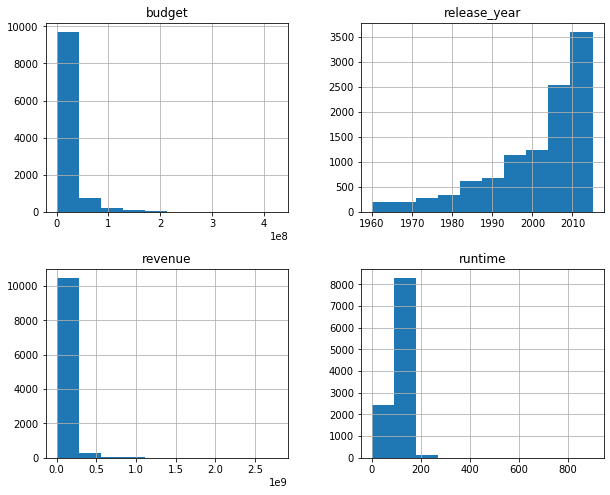

In [22]:
data[['budget','revenue','release_year','runtime']].hist(figsize=(10,8));

# We see the distribution of the following columns

# We see that all of them are skewed to the right except release_year

## Data Cleaning 

#### To answer the questions in the introduction section we would need clean dataset.
#### So let's begin to clean our data.........


In [23]:
data.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [24]:
# We have observed that id,imdb_id,popularity,homepage,tagline,keywords,overview,production_companies,vote_count
# and vote_average columns not be much useful for contribution.

# So we will drop them from our DataFrame
cols_to_drop = ['id','imdb_id','popularity','homepage','tagline','keywords','overview','production_companies',
                'vote_count','vote_average']

data.drop(cols_to_drop,axis=1,inplace=True)

In [25]:
# Now just checking our data
data.head()

,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,1.379999e+08,1.392446e+09
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015,1.379999e+08,3.481613e+08
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2015,1.012000e+08,2.716190e+08
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015,1.839999e+08,1.902723e+09
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2015,1.747999e+08,1.385749e+09


In [26]:
# Number of rows and columns after removing unwanted columns
data.shape

(10866, 11)

In [27]:
# Checking for duplicate values again
data.duplicated().sum()

1

In [28]:
# Drop duplicates except for the first occurrence.
data.drop_duplicates(keep= 'first' , inplace =True)

In [29]:
# Checking for duplicate values again
data.duplicated().sum()

0

In [30]:
# Number of rows and columns after removing duplicate value
data.shape

(10865, 11)

In [31]:
# Now we will replace the budget,revenue,budget_adj and revenue_adj columns having 0 with NaN.

cols_to_replace = ['budget','revenue','runtime','budget_adj','revenue_adj',]

data[cols_to_replace] = data[cols_to_replace].replace(0,np.NaN) 

In [32]:
# We have confirmed that none of the specified columns have their row values as 0.
(data[cols_to_replace] == 0).all()

budget         False
revenue        False
runtime        False
budget_adj     False
revenue_adj    False
dtype: bool

In [33]:
# Now we will check for missing values again
data.isnull().sum()

budget            5696
revenue           6016
original_title       0
cast                76
director            44
runtime             31
genres              23
release_date         0
release_year         0
budget_adj        5696
revenue_adj       6016
dtype: int64

### Now we will drop the rows having NaN values in any of the column

In [34]:
data.dropna(axis=0,inplace=True)

In [35]:
data.shape

(3849, 11)

In [36]:
# Now we will check for missing values again
data.isnull().sum()

budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

We have data without missing values.Let's keep going........

In [37]:
# We will check the datatypes of all columns
data.dtypes

budget            float64
revenue           float64
original_title     object
cast               object
director           object
runtime           float64
genres             object
release_date       object
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

We will change the datatypes of budget,revenue,runtime,budget_adj and revenue_adj columns from float to int.

In [38]:
# We will make use of applymap()

cols_to_int = ['budget','revenue','runtime','budget_adj','revenue_adj']

data[cols_to_int] = data[cols_to_int].applymap(np.int64)

In [39]:
# We will check for datatypes of all columns again
data.dtypes

budget             int64
revenue            int64
original_title    object
cast              object
director          object
runtime            int64
genres            object
release_date      object
release_year       int64
budget_adj         int64
revenue_adj        int64
dtype: object

We see that the datatype for release_date is object, we will convert it into datetime object

In [40]:
# We will make use of pandas to_datetime method to convert into datetime object

data['release_date'] = pd.to_datetime(data['release_date'])

In [41]:
# We will check for datatypes again
data.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
budget_adj                 int64
revenue_adj                int64
dtype: object

In [42]:
data.head(3)

,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,budget_adj,revenue_adj
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,137999939,1392445892
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,137999939,348161292
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,101199955,271619025


budget_adj and revenue_adj are associated with the year 2010 .So we will append the year for clear understanding.

We assume budget and revenue  in terms of currency dollars.We will append dollar sign for  budget,revenue,budget_adj and revenue_adj.

In [43]:
# renaming the columns
data.rename(columns = {'budget':'budget($)','revenue':'revenue($)','budget_adj':'budget_in_2010($)',
                    'revenue_adj':'revenue_in_2010($)'}, inplace = True)

In [44]:
# We will check our dataframe
data.head(2)

,budget($),revenue($),original_title,cast,director,runtime,genres,release_date,release_year,budget_in_2010($),revenue_in_2010($)
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,137999939,1392445892
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,137999939,348161292


<a id='eda'></a>
## Exploratory Data Analysis

Let's dive into the movie ocean.......


### 1 . Which movie has the highest and lowest budget?


#### Let's write the functon which calculates the minimum and maximum value for a particular column

In [45]:
def highest_and_lowest(column) :
    
    highest_id = data[column].idxmax()  # here we are retrieving the id of the row for the column with maximum value
    
    highest_value_details = pd.DataFrame(data.loc[highest_id]) # here we are converting the max row information to dataframe
    
    lowest_id = data[column].idxmin()   # here we are retrieving the id of the row for the column with minimum value
    
    lowest_value_details = pd.DataFrame(data.loc[lowest_id])  # here we are converting the min row information to dataframe
    
    data_concatenate = pd.concat([highest_value_details,lowest_value_details],axis = 1)
    
    # concatenate the two dataframes into single dataframe.
    
    return data_concatenate  # returning the concatenated dataframe


In [46]:
highest_lowest_budget = highest_and_lowest('budget($)')

In [47]:
highest_lowest_budget

,2244,2618
budget($),425000000,1
revenue($),11087569,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00
release_year,2010,1999
budget_in_2010($),425000000,1


First column shows the movie which had the highest budget and second column shows the movie which had the lowest budget. 

#### Observations from the above information

###### 1) The highest budget is 425 Million Dollars  and the movie is "The Warrior's Way" which was directed by "Sngmoo Lee".

###### 2) The lowest budget is 1 Dollar and the movie is "Lost & Found" which was directed by "Jeff Pollack".
        


Looks like the whole cast of the movie 'Lost & Found' did the movie for free of cost.

### 2 . Which movie has the highest and lowest revenue?

In [48]:
highest_lowest_revenue = highest_and_lowest('revenue($)')

In [49]:
highest_lowest_revenue

,1386,5067
budget($),237000000,6000000
revenue($),2781505847,2
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00
release_year,2009,2003
budget_in_2010($),240886902,7112115


In the above dataframe, first column shows the movie which made the highest revenue at box office and second column shows the movie which made the lowest revenue at box office.

#### Observations from the above information

###### 1) The highest revenue is 2.7 Billion Dollars  and the movie is "Avatar" which was directed by "James cameron".

###### 2) The lowest revenue is 2 Dollars and the movie is "Shattered Glass" which was directed by "Billy Ray".
        


Avatar shattered the box office with a whopping amount of 2.7 Billion , that's a huge fortune while Shattered Glass failed miserably at the box office.

### 3 . Which movie has the highest and lowest runtime?

In [50]:
highest_lowest_runtime = highest_and_lowest('runtime')

In [51]:
highest_lowest_runtime

,2107,5162
budget($),18000000,10
revenue($),871279,5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00
release_year,2010,2003
budget_in_2010($),18000000,11


In the above dataframe , first column shows the movie which had highest runtime while second column shows the movie which had lowest runtime. 

#### Observations from the above information

###### 1) The highest runtime is 5.63 hours ~ 338 minutes and the movie is "Carlos" which was directed by "Olivier Assayas".

###### 2) The lowest runtime is 15 minutes and the movie is "Kid's Story" which was directed by "Shinichiro Watanabe".
        

Carlos has a running time of 5.63 hours Woah! that requires a lot of patience. I would have made this movie into TV Series 
while  Kid's Story has a running time of 15 minutes ,looks like it is a mini episode.

### 4 . Which movie has the highest profit and highest  loss?

We will insert the profit column which will help us find the answer for above question.

In [52]:
# We are inserting the profit column using insert method 
data.insert(loc=2,column = 'profit($)',value = data['revenue($)'] - data['budget($)']  )

In [53]:
# We will have a look at our data
data.head(1)

,budget($),revenue($),profit($),original_title,cast,director,runtime,genres,release_date,release_year,budget_in_2010($),revenue_in_2010($)
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,137999939,1392445892


In [54]:
highest_profit_loss = highest_and_lowest('profit($)')

In [55]:
highest_profit_loss

,1386,2244
budget($),237000000,425000000
revenue($),2781505847,11087569
profit($),2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00
release_year,2009,2010


In the above dataframe,first column shows the movie which made the highest profit while second column shows the movie which
made the highest loss.

#### Observations from the above information

###### 1) The highest profit is 2.54 Billion dollars and the movie is "Avatar" which was directed by "James Cameron".

###### 2) The highest loss is 413 Million dollars and the movie is "The Warrior's Way" which was directed by "Sngmoo Lee".
        

Avatar stands as the winner in terms of profit with a whopping amount of 2.54 Billion dollars while The Warrior's Way failed miserably at the box office.

# Now let's go for data visualization by plotting figures

##  Outliers in our data

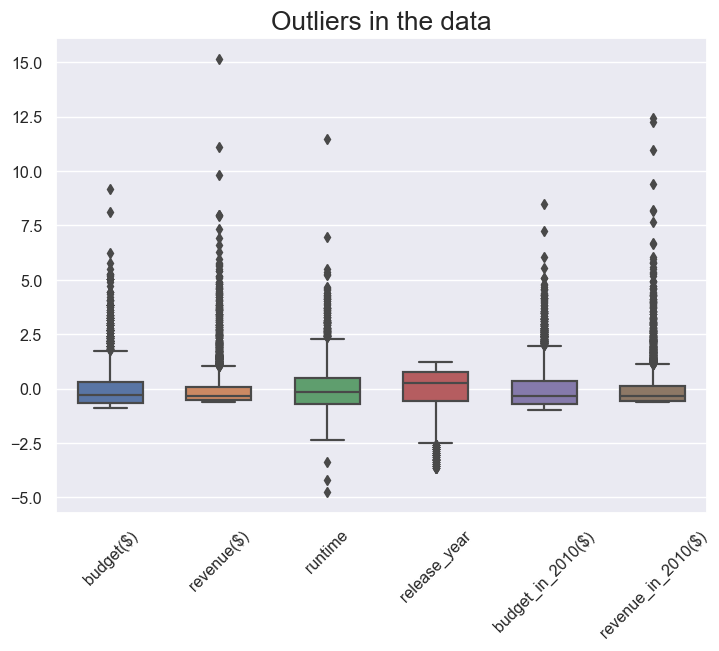

In [56]:
plottable_data = data.drop(['profit($)' ,'original_title','cast', 'director','genres','release_date'],axis=1)
# we are plotting the data which is of integer datatype only so we are dropping categorical columns


for col in plottable_data.columns:         # for each column in dataframecolumns
    mean  = plottable_data[col].mean()     # mean of each column
    stdev = plottable_data[col].std()      # standard deviation of each column
    plottable_data[col] = plottable_data[col].apply(lambda x : (x-mean)/stdev ) # Normalizing the data of each column
    
    
sns.set()
# setting the background of the figure
    

plt.figure(figsize = (8,6), dpi =105)
# we are setting the figure size and resolution

sns.boxplot(data = plottable_data,width = 0.6)
# we are making use of boxplot 

plt.title('Outliers in the data',fontsize = 18)
# Title of the plot

plt.xticks(np.arange(6),plottable_data.columns,rotation=45)
# setting the tick labels for the x-axis at an angle of 45 degree

plt.show()
# Displaying the figure      

#### We see that all of our columns have outliers.

## Revenue of movies in each year

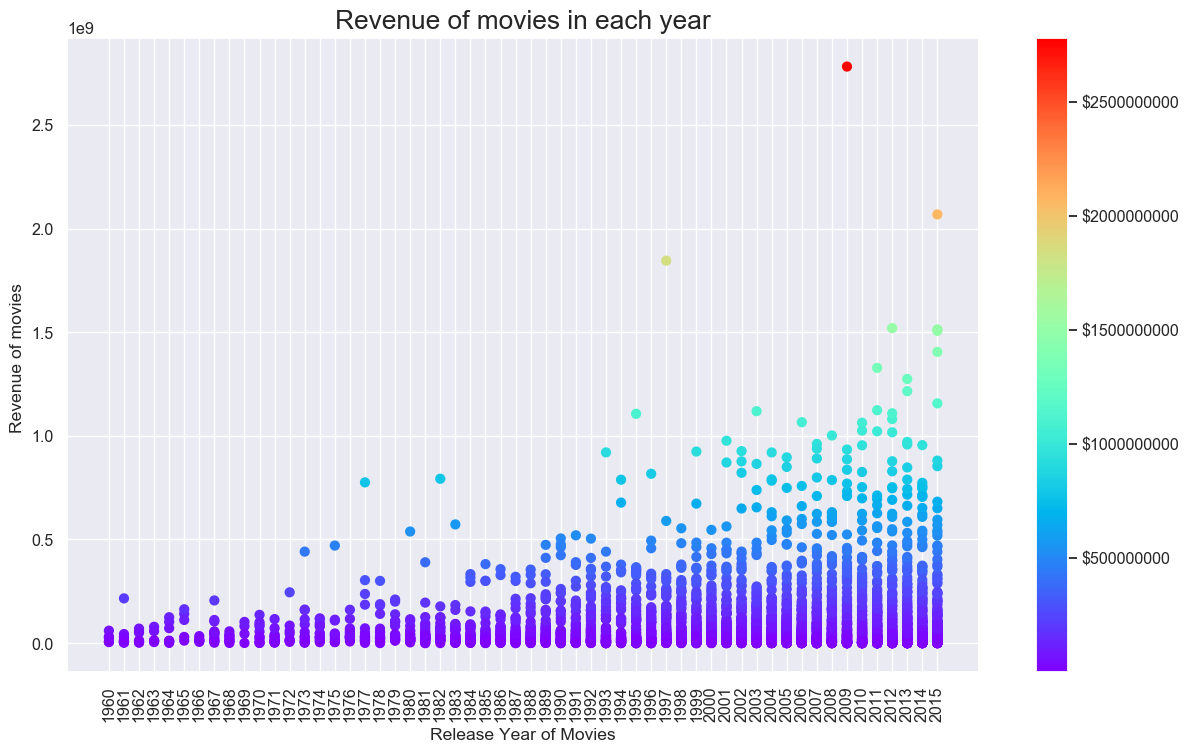

In [57]:
sns.set()
# setting the background of the figure

plt.figure(figsize = (14,8), dpi =105)
# we are setting the figure size and resolution

plt.title('Revenue of movies in each year',fontsize=18)
# Title of the plot

plt.xlabel('Release Year of Movies', fontsize = 12)
# we are setting the label for x-axis  using specified  fontsize 

plt.ylabel('Revenue of movies ', fontsize = 12)
# we are setting the label for y-axis  using specified  fontsize

sctr = plt.scatter(x=data['release_year'],y=data['revenue($)'], c=data['revenue($)'] , cmap='rainbow')
# plotting the scatterplot between release year and revenue of the movies , applying color to revenue with colormap as rainbow

plt.colorbar(sctr, format='$%d')
# plotting the colorbar beside the figure with format in $ (dollars)

plt.xticks(np.arange(1960,2016),rotation = 90)
# setting the tick labels for the x-axis at an angle of 90 degrees

plt.show()
# Displaying the figure 

 At the top of y-axis we have 1e9 which means exponential to the power 9.For suppose we take a value on the y-axis 2.5,
its original value is 2.5 * 1e9 = 2,500,000,000 which is equal to 2.5  Billion dollars.Since our graph cannot accomodate such huge amount of space for plotting the values , so it is represented in this way.

### Observations made from above

#### 1) Most of the movies have collected less than 500 million dollars over time.
#### 2) Highest revenue was made by a movie in the year 2009.
#### 3) Highest revenue was made by  movies in the year 2015.
#### 4) Least revenue was made by  movies in the year 1966.

##   Runtime of all the movies

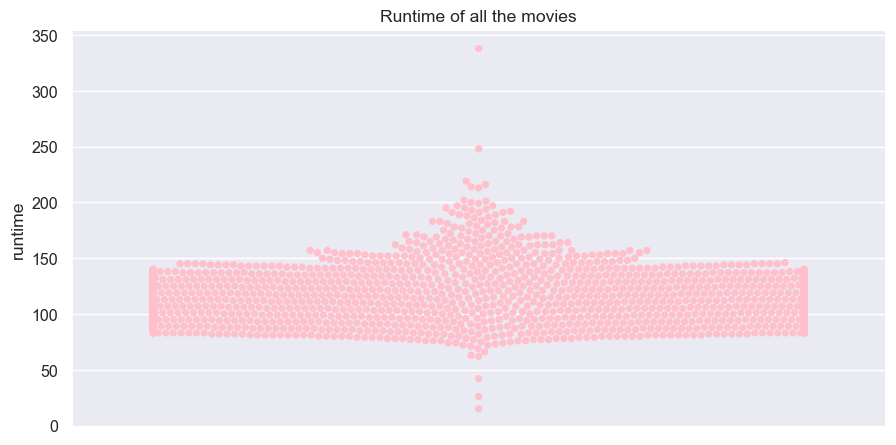

In [58]:
sns.set()
# setting the background of the figure

plt.figure(figsize = (10,5), dpi =105) 
# Here we are setting the figure size and resolution.

sns.swarmplot(data['runtime'],orient='v',color='pink') 
# We are plotting using swarmplot in the vertical view using color pink

plt.title('Runtime of all the movies')
# Title of the plot

plt.show()
# Displaying the figure

### Observations made from above figure

#### 1) Highest Runtime of all movies is almost 340 minutes which is approximately equal to 5.7 hours.
#### 2) Lowest Runtime of all movies is almost 15 minutes.
#### 3) We see that most number of movies are having runtime between 75-160 minutes.
#### 4) runtime column has moderately less outliers.

## Total number of movies released in an year

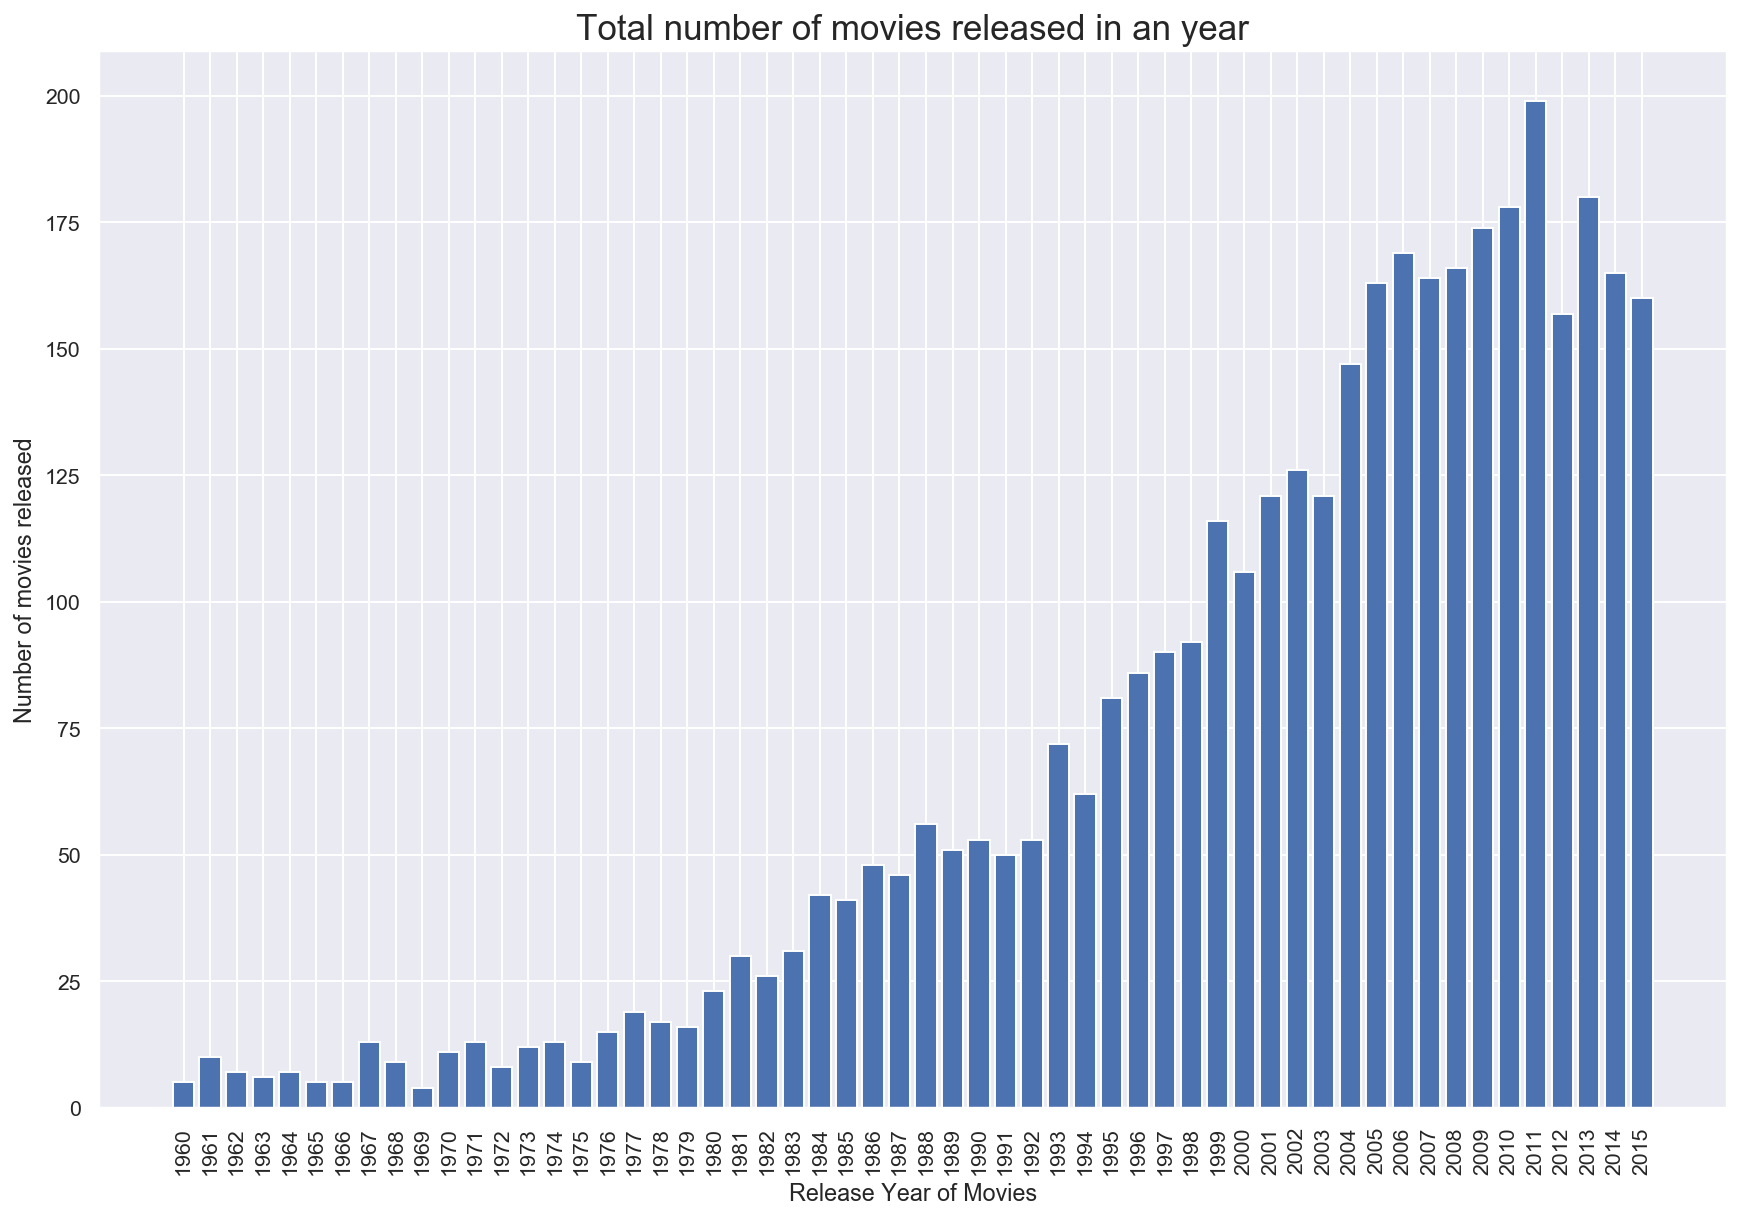

In [59]:
sns.set()
# setting the background of the figure

movies_by_year = data.groupby('release_year')['original_title'].count()
# We are grouping by release year and original title count so that we get number of movies released in each year

plt.figure(figsize=(15,10),dpi=140)
# we are plotting the figure by specifying the figure size and resolution

plt.xlabel('Release Year of Movies', fontsize = 12)
# we are setting the label for x-axis  using specified  fontsize 

plt.ylabel('Number of movies released', fontsize = 12)
# we are setting the label for y-axis  using specified  fontsize

plt.title('Total number of movies released in an year',fontsize=18)
# we are specifying the name for the title of the graph

plt.bar(np.arange(1960,2016),movies_by_year)
# we are plotting the bar graph 

plt.xticks(np.arange(1960,2016),rotation = 90)
# setting the tick labels for the x-axis at an angle of 90 degrees

plt.show()
# Displaying the figure



### Observations made from above 

#### 1) Most number of movies have been released in the year 2011 which is almost equal to 190.
#### 2) Least number of movies have been released in the year 1969 which is almost equal to 5.

## Total profit made by the movies in each year

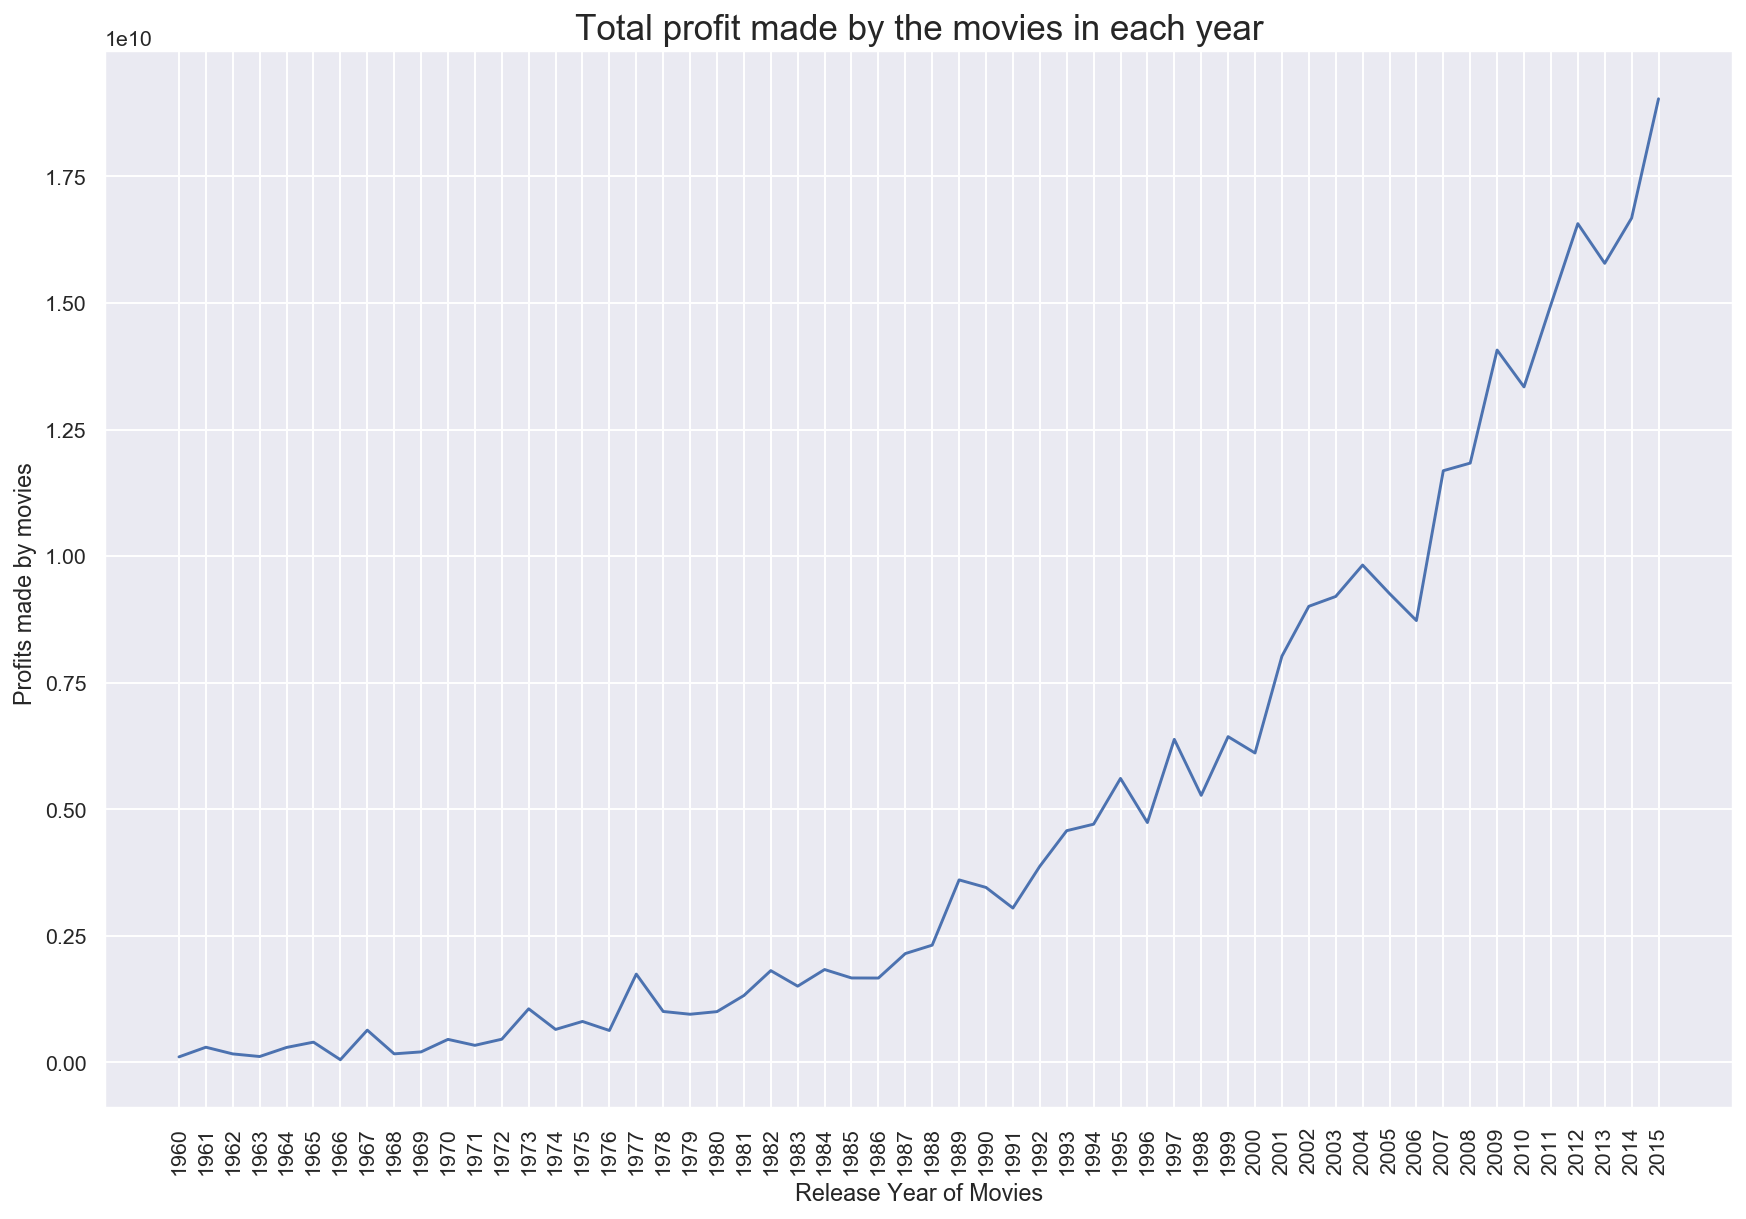

In [60]:
sns.set()
# setting the background of the figure

profits_by_year = data.groupby('release_year')['profit($)'].sum()
# We are grouping by release year and  profit so that we get the total profits of the movies in each year.

plt.figure(figsize=(15,10),dpi=140)
# we are plotting the figure by specifying the figure size and resolution

plt.xlabel('Release Year of Movies', fontsize = 12)
# we are setting the label for x-axis  using specified  fontsize 

plt.ylabel('Profits made by movies ', fontsize = 12)
# we are setting the label for y-axis  using specified  fontsize

plt.title('Total profit made by the movies in each year',fontsize=18)
# we are specifying the name for the title of the graph

plt.plot(np.arange(1960,2016),profits_by_year)
# we are plotting the line graph

plt.xticks(np.arange(1960,2016),rotation = 90)
# setting the tick labels for the x-axis at an angle of 90 degrees

plt.show()
# Displaying the figure



 At the top of y-axis we have 1e10 which means exponential to the power 10.For suppose we take a value on the y-axis 1.75,
its original value is 1.75 * 1e10 = 17,500,000,000 which is equal to 17.5  Billion dollars.Since our graph cannot accomodate such huge amount of space for plotting the values , so it is represented in this way.

### Observations made from above 

#### 1) Highest profits had been made in the year 2015 which is approximately 18.8 billion dollars .
#### 2) Least profits or Highest loss had been made in the year 1966 .

## Top 5 highest Budget Movies

In [61]:
def top_five(column_name) : #method which takes a particular column
    top_five = data[column_name].sort_values(ascending = False).head(5) # sorting to get the top five values of the column
    new_list=[]  # empty list
    for ind in top_five.index:  # looping through the column indices
        extract_title = data.loc[ind,'original_title'] # Extracting the movie title at the respective index
        new_list.append(extract_title)   # appending the movie title to the list
    return pd.DataFrame({column_name : top_five,'movie_title':new_list},index=None) # returning the combined dataframe

In [62]:
top_5_budget_movies = top_five('budget($)')

<Figure size 1260x840 with 0 Axes>

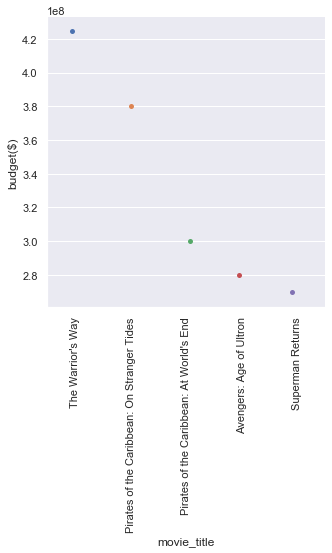

In [63]:
sns.set()
# setting the background of the figure

plt.figure(figsize = (12,8), dpi =105)
# we are plotting the figure by specifying the figure size and resolution

sns.catplot(x='movie_title',y='budget($)',data = top_5_budget_movies)
# plotting catplot with movie_title on x-axis and budget on y -axis to get the top 5 budget movies

plt.xticks(np.arange(5),rotation = 90);
# setting the tick labels for the x-axis at an angle of 90 degrees


At the top of y-axis we have 1e8 which means exponential to the power 8.For suppose we take a value on the y-axis 4.2, its original value is 4.2 * 1e8 = 420,000,000 which is equal to 420 Million dollars.Since our graph cannot accomodate such huge amount of space for plotting the values , so it is represented in this way.

### Observations made from above 

#### 1) The movie which was made on highest budget was "The Warrior's Way" with a budget of 425 Million Dollars.
#### 2) "Pirates of the Caribbean" franchise itself is contributing 380 Million + 300 Million = 680 Million Dollars.

## Top 5 highest Runtime Movies

In [64]:
top_5_runtime_movies = top_five('runtime')

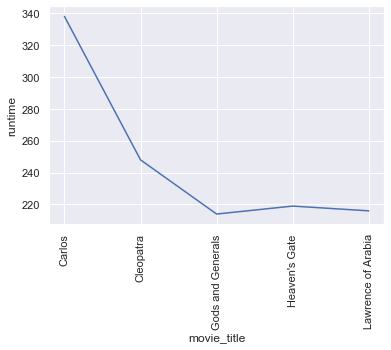

In [65]:
sns.set()
# setting the background of the figure

sns.lineplot(x='movie_title', y='runtime', data=top_5_runtime_movies)
# plotting line plot between movie title and runtime for top five runtime movies
    
plt.xticks(np.arange(5),rotation = 90);
# setting the tick labels for the x-axis at an angle of 90 degrees


### Observations made from above

#### 1) Movie with highest runtime is "Carlos" with running time approximately 340 mins i.e. 5 1/2 hours.
#### 2) Difference between highest and second highest runtime movies is 340 - 250 = 90 mins i.e. 1 1/2 hour.

## Top 5  Directors who directed the most movies

In [66]:
# We are the sorting according to the director who has directed the most movies and we choose top five
top_five_directors = data['director'].value_counts().head(5)
top_five_directors

Steven Spielberg    27
Clint Eastwood      24
Ridley Scott        21
Woody Allen         18
Martin Scorsese     17
Name: director, dtype: int64

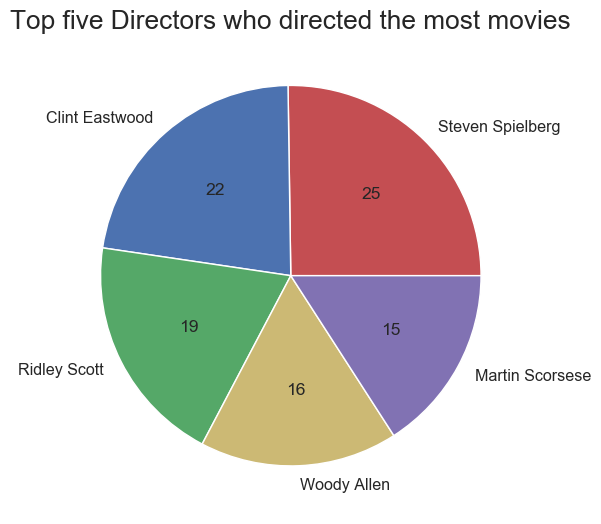

In [67]:
sns.set()
# setting the background of the figure

plt.figure(figsize = (8,6), dpi =105)
# we are plotting the figure by specifying the figure size and resolution

plt.title('Top five Directors who directed the most movies',fontsize=18)
# title for the graph

colors = ['r','b','g','y','m']
# setting the color for each portion of the piechart

plt.pie(top_five_directors.values,labels=top_five_directors.index,colors = colors,autopct = '%d')
# plotting piechart for the top five directors with respective color for their portion

plt.show()
# Display the figure

### Observations from above

#### 1) Steven Spielberg has directed the most films . He's the kingmaker here.
#### 2) These top five directors are the legends of film industry.

We could also interpret in this way . Most of these legendary director's films would have been successful at box office ,since more the successful films directed ,more the producers would ask that director to make films for their production company.   

In [68]:
def data_extraction(column_name): # method which takes the column name
    
    concat_data = data[column_name].str.cat(sep = '|') # Concatenate strings in the column_name Series with  separator '|'
    
    split_data = pd.Series(concat_data.split('|'))  # Split string (concat_data) around given separator '|'
    
    count_value = split_data.value_counts(ascending = False)  # count the values in descending order
    
    return count_value  # return the count value

## Frequency of Top 10 Movie Genres

In [69]:
top_10_genres = data_extraction('genres').head(10)
top_10_genres

Drama              1753
Comedy             1357
Thriller           1203
Action             1085
Adventure           749
Romance             666
Crime               651
Science Fiction     519
Horror              463
Family              425
dtype: int64

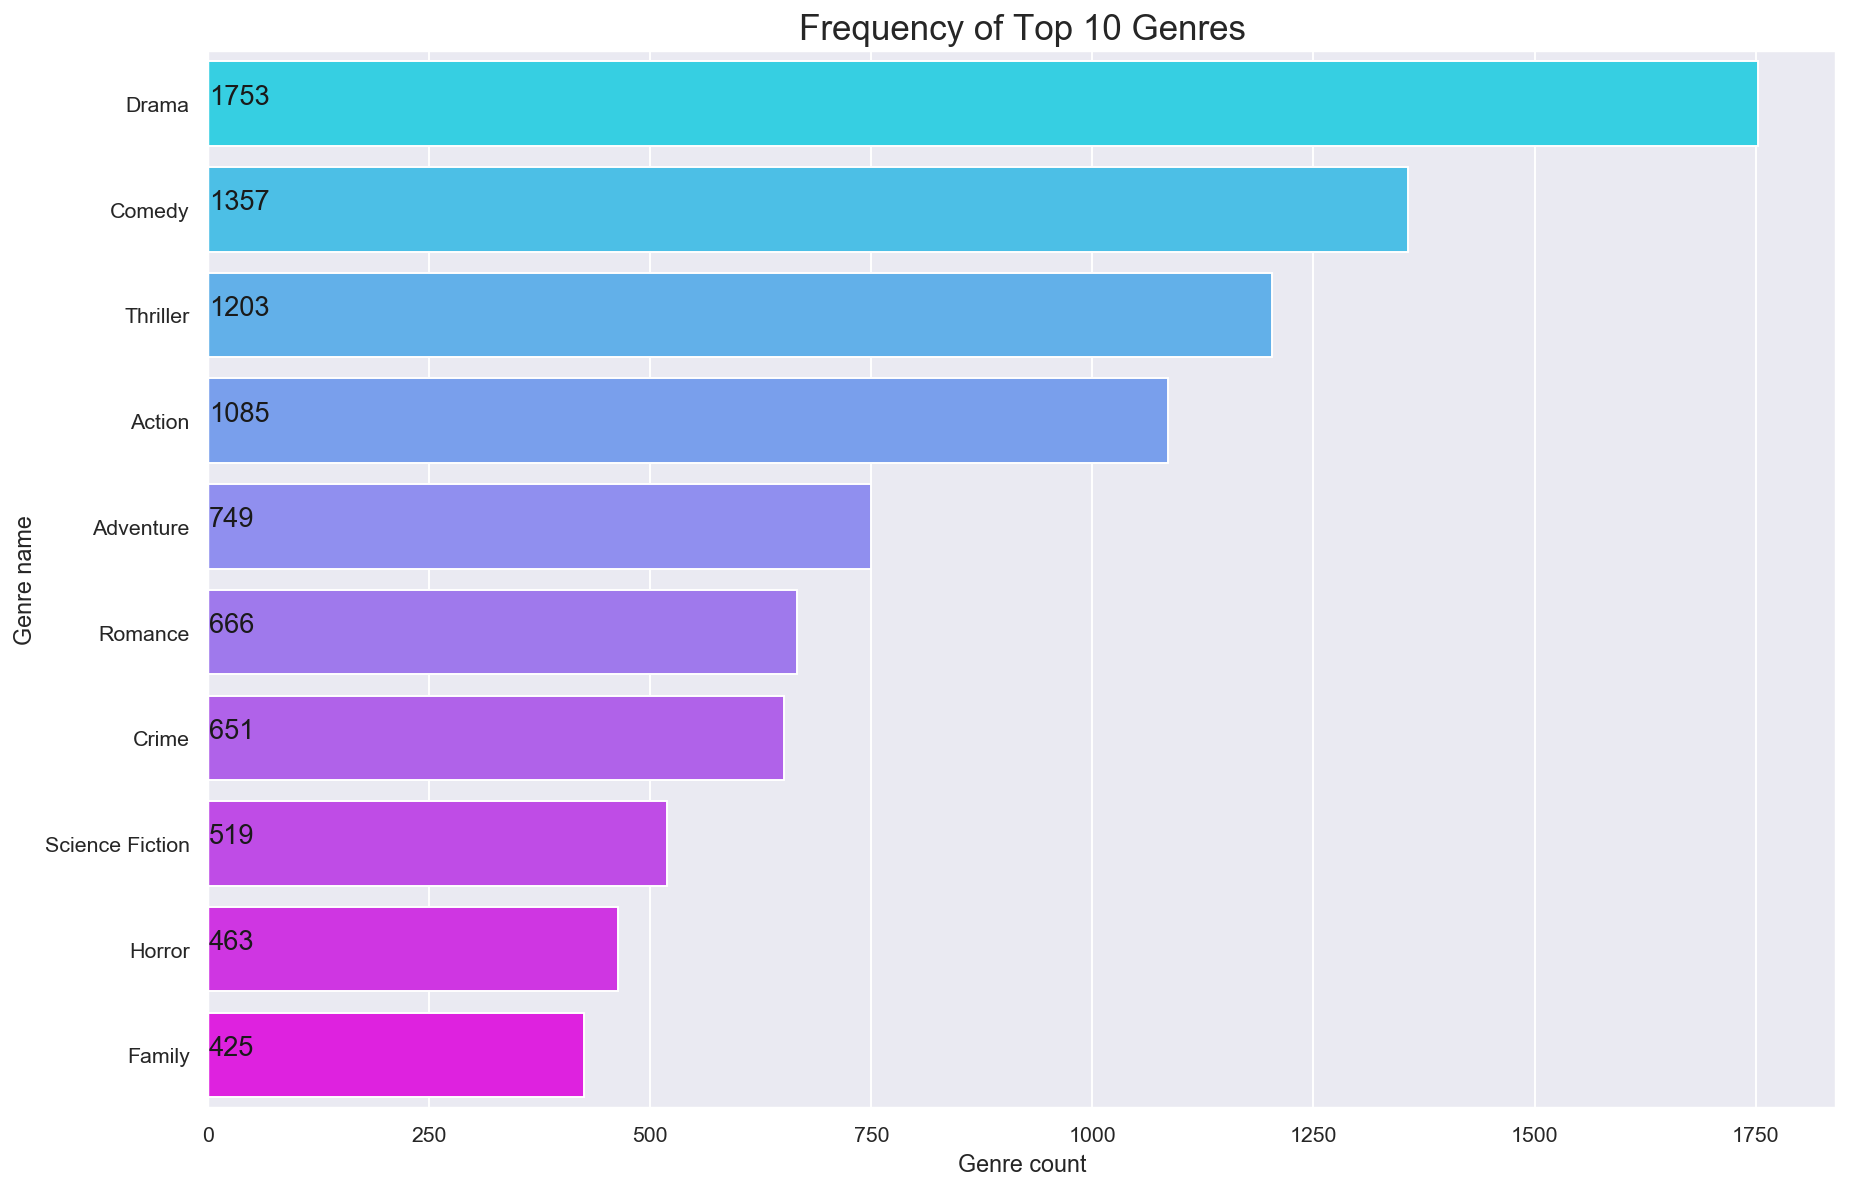

In [70]:
sns.set()
# setting the background of the figure

plt.figure(figsize=(15,10),dpi=140)
# we are plotting the figure by specifying the figure size and resolution

c = plt.cm.cool 
# Linear segmented color map

plt.title("Frequency of Top 10 Genres", fontsize=18)
# title for the graph

plt.xlabel('Genre count', fontsize=12)
# we are setting the label for x-axis  using specified  fontsize 


plt.ylabel('Genre name', fontsize=12)
# we are setting the label for y-axis  using specified  fontsize 


sns.barplot(top_10_genres.values, top_10_genres.index,
            palette=[c(0.1),c(0.2),c(0.3),c(0.4),c(0.5),c(0.6),c(0.7),c(0.8),c(0.9),c(0.99)])

# barplot of top 10 genres with palette (colors to use for the different levels of the graph)

for i, v in enumerate(top_10_genres.values): # Enumerated object

    plt.text(0.8,i,v,color='k',fontsize=14) #plotting  text for each level
    
    


### Observations made from above

#### Drama,Comedy,Thriller,Action and Adventure occupy the first five movie genre positions .

## Top 10 Actors who acted in Most number of films

In [71]:
top_10_cast = data_extraction('cast').head(10)
top_10_cast

Robert De Niro        52
Bruce Willis          46
Samuel L. Jackson     44
Nicolas Cage          43
Matt Damon            36
Johnny Depp           35
Brad Pitt             34
Sylvester Stallone    34
Harrison Ford         34
Morgan Freeman        34
dtype: int64

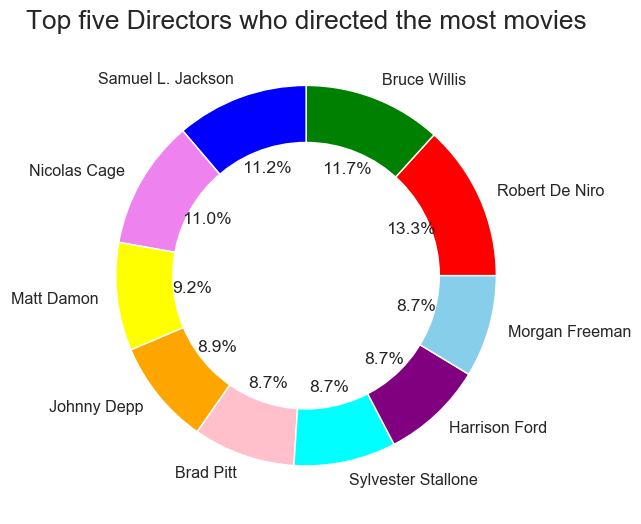

In [72]:
sns.set()
# setting the background of the figure

plt.figure(figsize = (8,6), dpi =105)
# we are plotting the figure by specifying the figure size and resolution

plt.title('Top five Directors who directed the most movies',fontsize=18)
# title for the graph

colors = ['red','green','blue','violet','yellow','orange','pink','cyan','purple','skyblue']
# colors for each portio of the donut plot

my_circle = plt.Circle((0,0),0.7,color ='white')
#create a circle with radius 0.7

plt.pie(top_10_cast.values, labels=top_10_cast.index, colors=colors,autopct = '%1.1f%%' )
# plotting donut plot with respective colors and their repective % (portion) to the data.

p=plt.gcf()
# Get the current figure.

p.gca().add_artist(my_circle)
# get the axes

plt.show()
# Display the figure

### Observations from above

#### Robert De Niro is the actor who has acted in most number of movies contributing 13.3% in the top 10.

We  could say that all these actors are legends . They have acted in more number of films as they just did not act they lived  those characters in the movies.

## Year_vs_Month count of all movies from the year 2000 to 2015

In [73]:
# query for filtering the data with release_date from the year 2000 to 2015
movies_2000_2015 = data.query('release_date > "2000-01-01 00:00:00" and release_date < "2016-01-01 00:00:00"')

In [74]:
# We are reindexing the new dataframe
movies_2000_2015.index = range(len(movies_2000_2015))

# Initialisation of index will start from 1 to length of the dataframe
movies_2000_2015.index = movies_2000_2015.index + 1

In [75]:
# Creating the column Year by extracting the year from release_date column
movies_2000_2015['Year'] = movies_2000_2015['release_date'].apply(lambda x : x.year)

# Creating the column Month by extracting the month from release_date column
movies_2000_2015['Month'] = movies_2000_2015['release_date'].apply(lambda x : x.month)

In [76]:
# We are first grouping by year then month and get the values count and unstack(Month index becomes column)
movies_2000_2015= movies_2000_2015.groupby('Year')['Month'].value_counts().unstack()

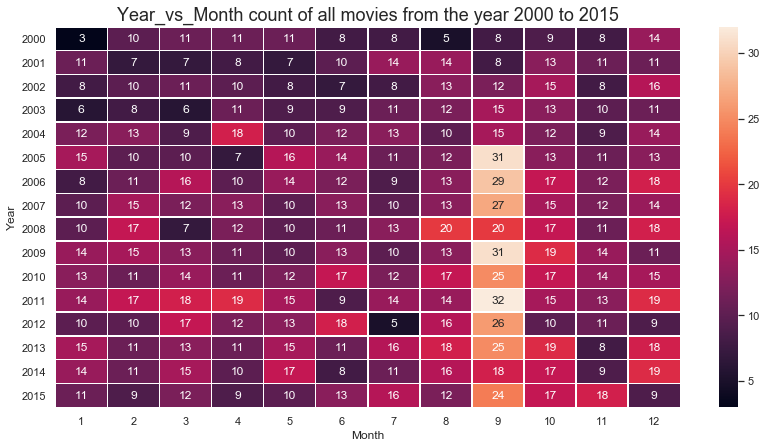

In [77]:
# Create a figure and a set of subplots.
f, ax = plt.subplots(figsize=(14, 7))

# Title of the graph
plt.title('Year_vs_Month count of all movies from the year 2000 to 2015',fontsize = 18)

# Plot rectangular data as a color-encoded matrix with annot as True(values will be written in cell) .
sns.heatmap(movies_2000_2015,annot=True,fmt="d",linewidths = .5,ax = ax)

### Observations from above

#### 1) Least number of movies have been released in the month of January in the year 2000 which is 3.
#### 2) Most number of movies have been released in the month of September in the year 2011 which is 32.
#### 3) We see that more number of movies are released in the month of September  since 2005 .

<a id='conclusions'></a>
## Conclusions

Finally i have gained good information about movies. 

I wish to expect a movie with Johnny Depp as the Lead Actor , Steven Speilberg as the Director , Morgan Freeman as 
Supporting Actor and  Genres to be Drama and Thriller.

People will be having higher expectations when the director or actor gives more number of successful films which will also
generate huge revenue but story is the ultimate winner.

There may be other factors which can also influence the movie's success or failure apart from the characteristics we have discussed above like weather,Price of the tickets etc.

## References

https://pandas.pydata.org/docs/getting_started/tutorials.html

https://seaborn.pydata.org/

https://medium.com/

https://towardsdatascience.com/

https://www.analyticsvidhya.com/